<a href="https://colab.research.google.com/github/deepsinhchauhan/House-Pricing-Analysis/blob/main/House%20Pricing%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SquareFeet           50000 non-null  int64  
 1   Bedrooms             50000 non-null  int64  
 2   Bathrooms            50000 non-null  int64  
 3   YearBuilt            50000 non-null  int64  
 4   Price                50000 non-null  float64
 5   Neighborhood_Suburb  50000 non-null  bool   
 6   Neighborhood_Urban   50000 non-null  bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 2.0 MB
None

📊 Summary Statistics:
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.0000

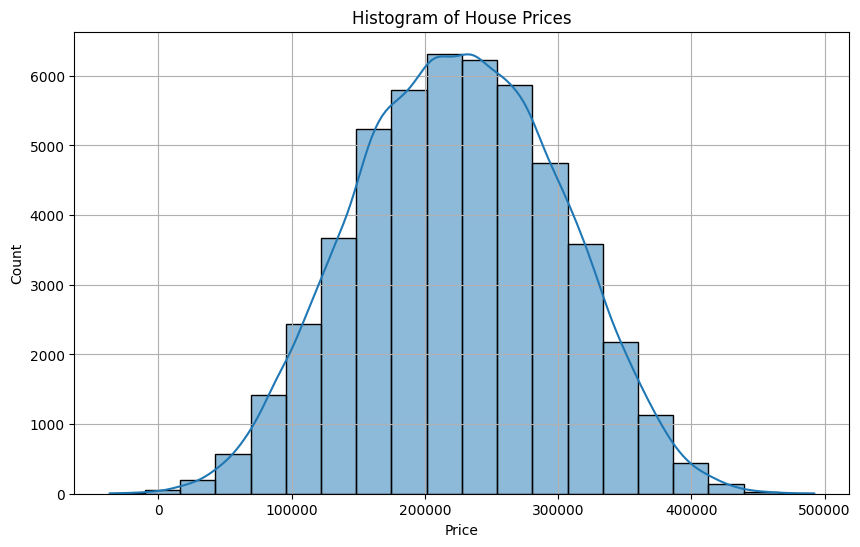

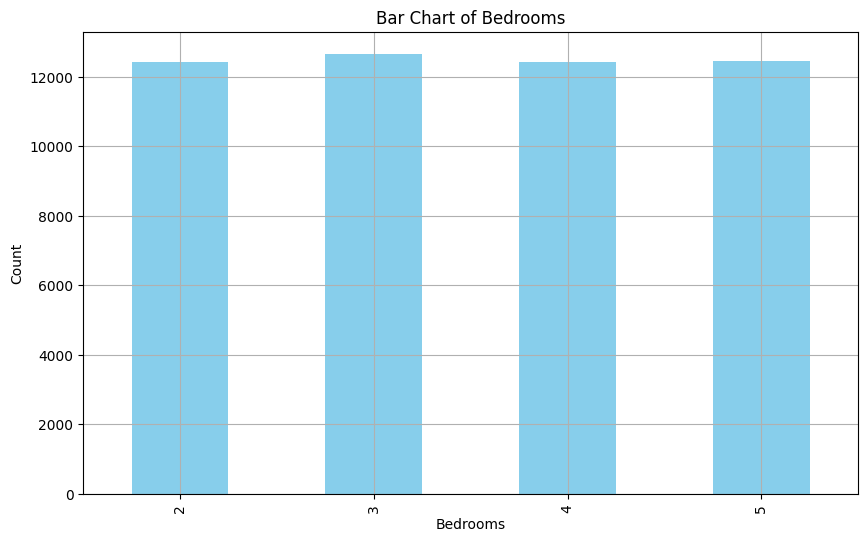

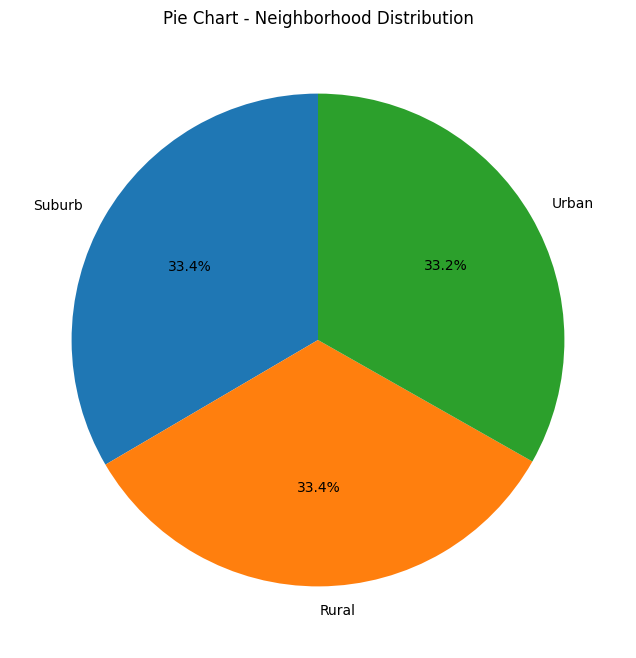

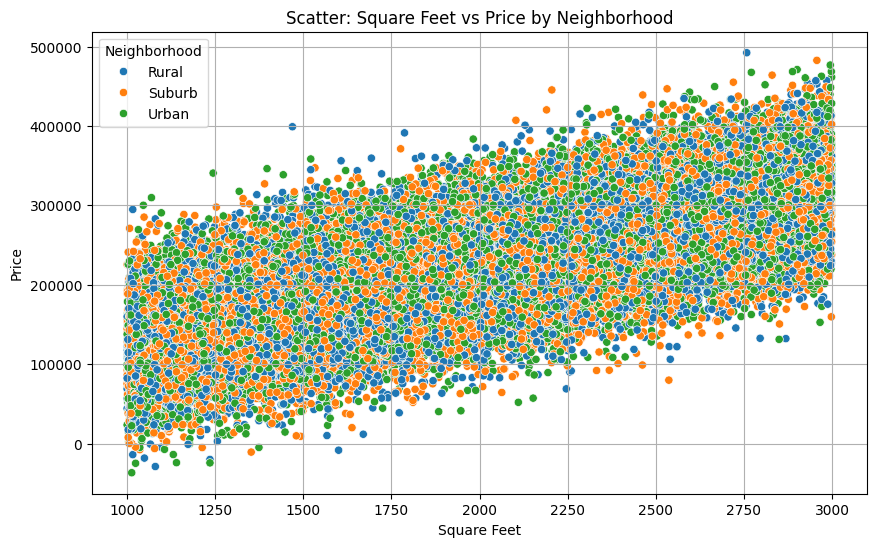

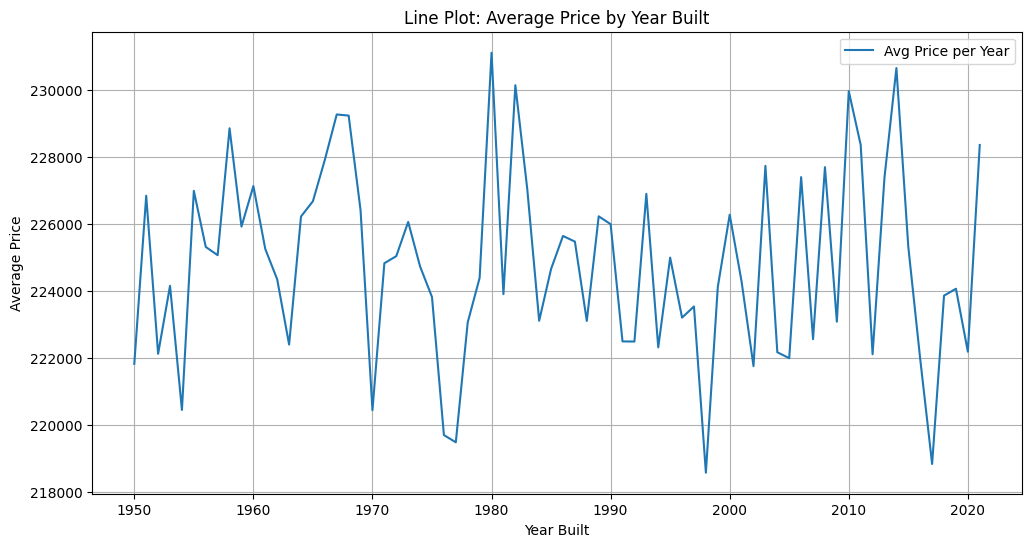


🔁 Linear Regression Coefficients:
SquareFeet               99.344247
Bedrooms               5230.284985
Bathrooms              2968.500901
YearBuilt                -5.706994
Neighborhood_Suburb    -595.530865
Neighborhood_Urban     1416.202219
dtype: float64
Intercept: 12322.87355783413


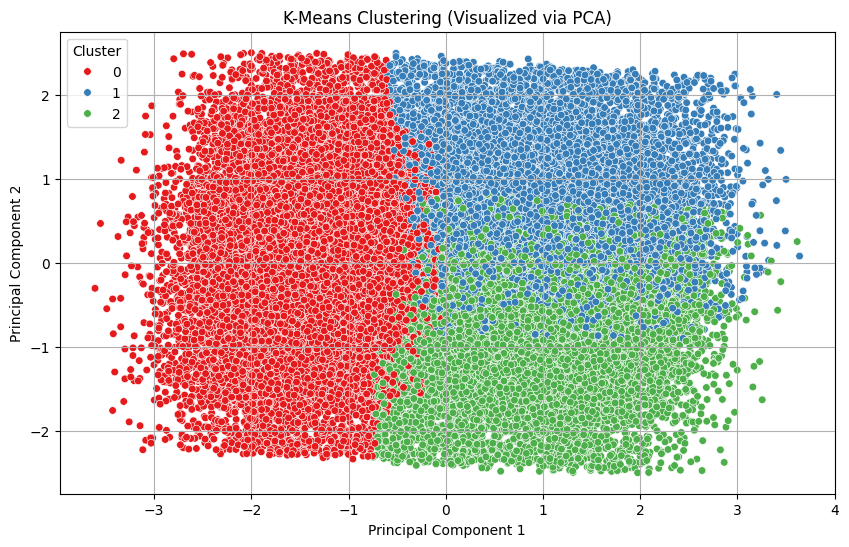


🔍 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      7499
           1       0.77      0.78      0.78      7501

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000



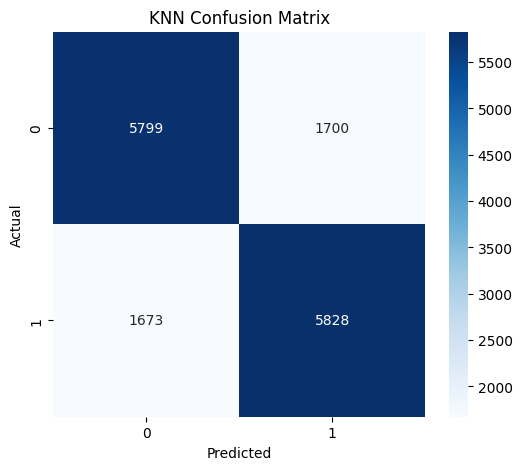


🧠 CNN Model (Demo Only - for image classification)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 📥 Load and Prepare Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Input

# Load dataset
df = pd.read_csv('/content/housing_price_dataset.csv')
df_original = df.copy()  # for plots

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# -------------------------------
# 📊 DESCRIPTIVE ANALYSIS
# -------------------------------

print("📄 Dataset Info:")
print(df.info())

print("\n📊 Summary Statistics:")
print(df.describe())

print("\n➕ Median of Numeric Columns:")
print(df.median(numeric_only=True))

print("\n🎯 Mode of Columns:")
for col in df.columns:
    print(f"Mode of {col}: {list(df[col].mode())}")

print("\n📐 Skewness:")
print(df.skew(numeric_only=True))

print("\n📈 Kurtosis:")
print(df.kurtosis(numeric_only=True))

# -------------------------------
# 📊 VISUALIZATIONS
# -------------------------------

# Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=20)
plt.title("Histogram of House Prices")
plt.xlabel("Price")
plt.grid(True)
plt.show()

# Bar Chart - Bedrooms
plt.figure(figsize=(10, 6))
df_original['Bedrooms'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Bar Chart of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Pie Chart - Neighborhood
plt.figure(figsize=(8, 8))
df_original['Neighborhood'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart - Neighborhood Distribution")
plt.ylabel("")
plt.show()

# Scatter Plot - SquareFeet vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_original, x='SquareFeet', y='Price', hue='Neighborhood')
plt.title("Scatter: Square Feet vs Price by Neighborhood")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# ✅ Line Plot - Avg Price per Year (with Legend)
avg_price_by_year = df_original.groupby('YearBuilt')['Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_year, x='YearBuilt', y='Price', label='Avg Price per Year')
plt.title("Line Plot: Average Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 🔁 INFERENTIAL ANALYSIS
# -------------------------------

# Linear Regression
X_lr = df.drop(columns=["Price"])
y_lr = df["Price"]
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

print("\n🔁 Linear Regression Coefficients:")
print(pd.Series(lr_model.coef_, index=X_lr.columns))
print("Intercept:", lr_model.intercept_)

# ✅ Improved K-Means Clustering Visualization (with PCA)
features = ['Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', 'Price']
df_cluster = df_original[features].copy()
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_cluster)
df_cluster['Cluster'] = clusters

# Apply PCA for better visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_cluster)
df_cluster['PCA1'] = pca_components[:, 0]
df_cluster['PCA2'] = pca_components[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=30)
plt.title("K-Means Clustering (Visualized via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# KNN Classification (binary: above/below median price)
median_price = df["Price"].median()
df['Price_Class'] = (df["Price"] > median_price).astype(int)

X_cls = df.drop(columns=["Price", "Price_Class"])
y_cls = df["Price_Class"]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_cls, y_train_cls)
y_pred_cls = knn.predict(X_test_cls)

print("\n🔍 KNN Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

# Confusion Matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# 🧠 MACHINE LEARNING DEMO: CNN
# -------------------------------

print("\n🧠 CNN Model (Demo Only - for image classification)")
cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
